# PCA on brain cancer (6+1) training data

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

df  = pd.read_csv("6+1 before PCA.csv")
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['1427.2869', '1423.4293', '1419.5719', '1415.7144', '1411.8568', '1407.9993', '1404.1417', '1400.2842', '1396.4266', '1392.5691', '1388.7115', '1384.854', '1380.9966', '1377.139', '1373.2815', '1369.424', '1365.5664', '1361.7089', '1357.8513', '1353.9938', '1350.1362', '1346.2787', '1342.4211', '1338.5637', '1334.7062', '1330.8486', '1326.9911', '1323.1335', '1319.276', '1315.4185', '1311.5609', '1307.7034', '1303.8458', '1299.9884', '1296.1309', '1292.2733', '1288.4158', '1284.5582', '1280.7007', '1276.8431', '1272.9856', '1269.1281', '1265.2705', '1261.4131', '1257.5555', '1253.698', '1249.8405', '1245.9829', '1242.1254', '1238.2678', '1234.4103', '1230.5527', '1226.6952', '1222.8376', '1218.9802', '1215.1227', '1211.2651', '1207.4076', '1203.55', '1199.6925', '1195.835', '1191.9774', '1188.1199', '1184.2623', '1180.4049', '1176.5474', '1172.6898', '1168.8323', '1164.9747', '1161.1172', '1157.2596', '1153.4021', '1149.5446', '1145.687', '1141.8295', '1137.972', '1134.

In [2]:
df.shape

(240, 138)

In [3]:
df.head()
# df.head() displays first five rows of our datasets.

,1427.2869,1423.4293,1419.5719,1415.7144,1411.8568,1407.9993,1404.1417,1400.2842,1396.4266,1392.5691,...,933.5228,929.6653,925.8077,921.9502,918.0927,914.2351,910.3776,906.5201,902.6625,class
0,0.022179,0.009806,-0.065457,-0.099150,-0.095546,-0.082718,-0.064123,-0.041132,-0.026961,0.001175,...,0.000301,0.003282,0.005528,0.011743,0.020956,0.026893,0.021537,0.008566,0.000666,*NKG*
1,0.020870,0.006631,-0.071893,-0.106774,-0.097418,-0.078455,-0.057775,-0.039490,-0.029143,0.002803,...,0.000358,0.008145,0.009536,0.008358,0.015939,0.029121,0.027823,0.011042,0.000289,*NKG*
2,0.022588,0.004629,-0.067922,-0.090184,-0.089722,-0.084648,-0.066549,-0.038269,-0.014495,0.018981,...,0.006473,0.007327,0.009663,0.014073,0.018120,0.022319,0.020642,0.009328,0.000573,*NKG*
3,0.020435,0.006939,-0.058675,-0.088221,-0.094679,-0.087887,-0.067807,-0.037087,-0.012405,0.016493,...,0.005665,0.010465,0.011153,0.012487,0.019123,0.028242,0.025644,0.008967,-0.000653,*NKG*
4,0.016654,0.006748,-0.050935,-0.087695,-0.097994,-0.085774,-0.063599,-0.036366,-0.016946,0.009233,...,0.005085,0.010772,0.013180,0.014233,0.019341,0.026118,0.023500,0.010141,0.000618,*NKG*


In [4]:
df.corr()

,1427.2869,1423.4293,1419.5719,1415.7144,1411.8568,1407.9993,1404.1417,1400.2842,1396.4266,1392.5691,...,937.3803,933.5228,929.6653,925.8077,921.9502,918.0927,914.2351,910.3776,906.5201,902.6625
1427.2869,1.000000,0.970129,0.593869,-0.012105,0.110334,0.645548,0.613192,0.379616,-0.331274,-0.605648,...,0.292329,0.285911,0.160845,0.046789,0.051813,0.113903,0.050151,-0.042236,0.004141,0.064004
1423.4293,0.970129,1.000000,0.719682,0.039875,0.075205,0.625725,0.635516,0.453467,-0.237118,-0.581479,...,0.358201,0.328862,0.151365,0.009121,0.010364,0.084708,0.038274,-0.049893,-0.005214,0.055820
1419.5719,0.593869,0.719682,1.000000,0.645559,0.435036,0.308073,0.156034,0.124480,0.070340,-0.113767,...,0.477069,0.421809,0.161834,0.045305,0.082668,0.108258,0.027671,-0.041590,-0.009827,0.031399
1415.7144,-0.012105,0.039875,0.645559,1.000000,0.839316,-0.048930,-0.468032,-0.458445,0.165514,0.386263,...,0.325281,0.302627,0.143365,0.141557,0.204358,0.140893,0.023771,-0.002242,-0.008322,-0.019901
1411.8568,0.110334,0.075205,0.435036,0.839316,1.000000,0.346267,-0.204136,-0.394414,-0.106235,0.098295,...,0.368806,0.359395,0.247757,0.215066,0.234593,0.170369,0.062517,0.040318,0.017465,-0.014827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918.0927,0.113903,0.084708,0.108258,0.140893,0.170369,0.106857,-0.051541,-0.214752,-0.279650,-0.144553,...,-0.174386,0.110852,0.491526,0.666113,0.867872,1.000000,0.822608,0.597818,0.604731,0.622483
914.2351,0.050151,0.038274,0.027671,0.023771,0.062517,0.089648,-0.015604,-0.170768,-0.297183,-0.182769,...,-0.258532,-0.021530,0.325107,0.384154,0.509278,0.822608,1.000000,0.915795,0.802153,0.701792
910.3776,-0.042236,-0.049893,-0.041590,-0.002242,0.040318,0.057566,-0.037688,-0.174561,-0.273671,-0.162982,...,-0.238747,-0.084161,0.199466,0.241486,0.308907,0.597818,0.915795,1.000000,0.912680,0.772435
906.5201,0.004141,-0.005214,-0.009827,-0.008322,0.017465,0.068920,-0.016078,-0.155127,-0.290495,-0.214664,...,-0.202131,-0.076896,0.202957,0.311809,0.405126,0.604731,0.802153,0.912680,1.000000,0.958814


Text(0.5, 1, 'Correlation between different fearures')

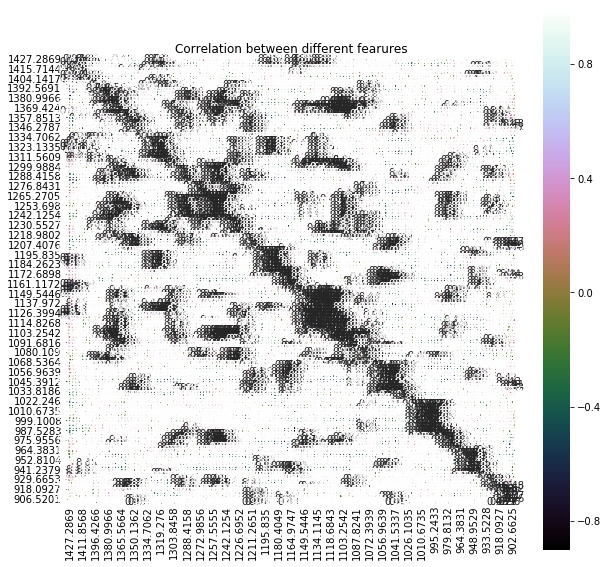

In [5]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [6]:
df_drop=df.drop(labels=['class'],axis=1)
labels=df['class']
cols = df_drop.columns.tolist()
cols

['1427.2869',
 '1423.4293',
 '1419.5719',
 '1415.7144',
 '1411.8568',
 '1407.9993',
 '1404.1417',
 '1400.2842',
 '1396.4266',
 '1392.5691',
 '1388.7115',
 '1384.854',
 '1380.9966',
 '1377.139',
 '1373.2815',
 '1369.424',
 '1365.5664',
 '1361.7089',
 '1357.8513',
 '1353.9938',
 '1350.1362',
 '1346.2787',
 '1342.4211',
 '1338.5637',
 '1334.7062',
 '1330.8486',
 '1326.9911',
 '1323.1335',
 '1319.276',
 '1315.4185',
 '1311.5609',
 '1307.7034',
 '1303.8458',
 '1299.9884',
 '1296.1309',
 '1292.2733',
 '1288.4158',
 '1284.5582',
 '1280.7007',
 '1276.8431',
 '1272.9856',
 '1269.1281',
 '1265.2705',
 '1261.4131',
 '1257.5555',
 '1253.698',
 '1249.8405',
 '1245.9829',
 '1242.1254',
 '1238.2678',
 '1234.4103',
 '1230.5527',
 '1226.6952',
 '1222.8376',
 '1218.9802',
 '1215.1227',
 '1211.2651',
 '1207.4076',
 '1203.55',
 '1199.6925',
 '1195.835',
 '1191.9774',
 '1188.1199',
 '1184.2623',
 '1180.4049',
 '1176.5474',
 '1172.6898',
 '1168.8323',
 '1164.9747',
 '1161.1172',
 '1157.2596',
 '1153.4021',


In [7]:
df_drop = df_drop.reindex(columns= cols)
X = df_drop.iloc[:,0:137].values
y = df_drop.iloc[:,0].values
X

array([[ 0.02217941,  0.00980571, -0.06545663, ...,  0.02153725,
         0.0085656 ,  0.00066576],
       [ 0.02087043,  0.00663141, -0.07189289, ...,  0.02782339,
         0.01104222,  0.00028854],
       [ 0.0225879 ,  0.00462858, -0.06792234, ...,  0.02064204,
         0.00932827,  0.00057292],
       ...,
       [ 0.02950669,  0.00780452, -0.04434335, ...,  0.02350115,
         0.01173227,  0.00135201],
       [ 0.03134396,  0.0159385 , -0.02814061, ...,  0.023576  ,
         0.0087201 ,  0.00066717],
       [ 0.03541336,  0.02814673, -0.01183236, ...,  0.0251202 ,
         0.01583103,  0.00469729]])

In [8]:
np.shape(X)

(240, 137)

## Data Standardisation

In [9]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Computing Eigenvectors and Eigenvalues:

In [10]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0041841   0.97418782  0.59635369 ... -0.04241287  0.0041587
   0.06427133]
 [ 0.97418782  1.0041841   0.72269303 ... -0.05010155 -0.00523588
   0.05605385]
 [ 0.59635369  0.72269303  1.0041841  ... -0.04176355 -0.00986853
   0.03153007]
 ...
 [-0.04241287 -0.05010155 -0.04176355 ...  1.0041841   0.91649855
   0.77566714]
 [ 0.0041587  -0.00523588 -0.00986853 ...  0.91649855  1.0041841
   0.96282603]
 [ 0.06427133  0.05605385  0.03153007 ...  0.77566714  0.96282603
   1.0041841 ]]


In [11]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.0041841   0.97418782  0.59635369 ... -0.04241287  0.0041587
   0.06427133]
 [ 0.97418782  1.0041841   0.72269303 ... -0.05010155 -0.00523588
   0.05605385]
 [ 0.59635369  0.72269303  1.0041841  ... -0.04176355 -0.00986853
   0.03153007]
 ...
 [-0.04241287 -0.05010155 -0.04176355 ...  1.0041841   0.91649855
   0.77566714]
 [ 0.0041587  -0.00523588 -0.00986853 ...  0.91649855  1.0041841
   0.96282603]
 [ 0.06427133  0.05605385  0.03153007 ...  0.77566714  0.96282603
   1.0041841 ]]


Text(0.5, 1, 'Correlation between different features')

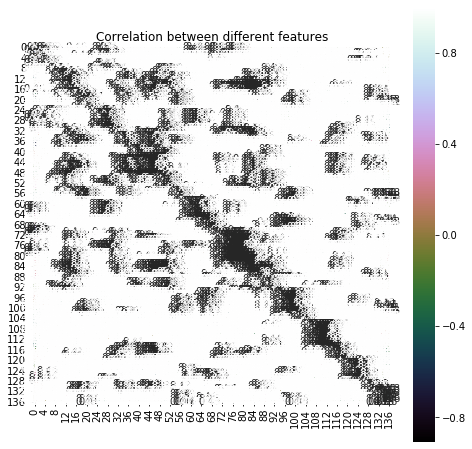

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.02197899  0.07399117  0.10146049 ...  0.08726926  0.07659875
  -0.10348577]
 [-0.02588643  0.08663345  0.09493231 ... -0.15508573 -0.13610311
   0.18392687]
 [-0.01134114  0.09728522  0.10165891 ...  0.11647615  0.10227682
  -0.1382958 ]
 ...
 [-0.04059981 -0.07217471  0.02384549 ...  0.0461275   0.03068355
   0.03648276]
 [-0.03489968 -0.07983557  0.04611377 ... -0.04781014 -0.03176896
  -0.03778455]
 [-0.01911126 -0.07777635  0.05674656 ...  0.02605175  0.01730628
   0.02058364]]

Eigenvalues 
[3.37717780e+01 3.11882149e+01 2.00428664e+01 1.18883685e+01
 9.19213968e+00 7.97487063e+00 5.86731442e+00 3.63027027e+00
 2.91918120e+00 1.99012058e+00 1.34776950e+00 1.10192508e+00
 9.17613770e-01 7.87083247e-01 6.28214617e-01 4.85945030e-01
 4.53055459e-01 3.72368439e-01 2.66475142e-01 2.28543942e-01
 2.25331106e-01 2.09957987e-01 1.70566150e-01 1.55176970e-01
 1.37222135e-01 1.35966931e-01 1.23559556e-01 1.14856101e-01
 1.01229282e-01 8.75217653e-02 8.07158248e-02 6.93637

In [14]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
33.771777978124746
31.18821491413814
20.04286639043486
11.888368451335955
9.192139676999263
7.974870627828606
5.8673144227565865
3.630270271489608
2.919181202262783
1.9901205785600555
1.3477695043151638
1.1019250799438496
0.9176137702167995
0.7870832474751026
0.62821461713477
0.48594502953839264
0.45305545905461003
0.3723684390960304
0.2664751419395206
0.2285439420641334
0.22533110642732357
0.2099579869232207
0.17056615002379402
0.15517696959881144
0.1372221347191556
0.135966930976381
0.12355955617281873
0.11485610086064481
0.10122928188102912
0.08752176525895244
0.0807158248251014
0.06936370122791168
0.06453561464981812
0.059512385013195605
0.04980904902187897
0.048759371815528176
0.047217087722752585
0.04250108882752482
0.03810585705677546
0.03535148424368982
0.034663216654012556
0.03098939099329592
0.02888483496064959
0.02822356151751179
0.025659347813593057
0.02360191193848867
0.02300617001246192
0.021095961100137752
0.02047669773779987
0.0187864953

In [15]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

Text(0, 0.5, 'Cumulative explained variance')

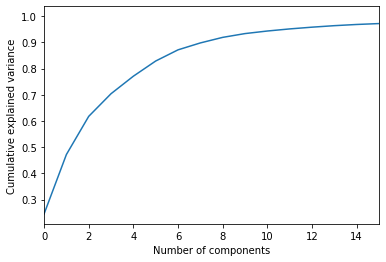

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,15,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [17]:
X_std

array([[-0.66789696, -0.58389705, -0.85763733, ..., -0.21973523,
        -0.40139942, -0.50790851],
       [-0.73509308, -0.65735668, -1.06005107, ...,  0.43730853,
        -0.15657625, -0.59336676],
       [-0.64692683, -0.703706  , -0.93518122, ..., -0.31330449,
        -0.32600653, -0.52894231],
       ...,
       [-0.29175017, -0.63020862, -0.19364598, ..., -0.01446338,
        -0.08836261, -0.35244005],
       [-0.19743393, -0.44197245,  0.3159136 , ..., -0.00663996,
        -0.38612622, -0.50758863],
       [ 0.01146882, -0.15945002,  0.82879139, ...,  0.15476427,
         0.31681539,  0.40542505]])

In [18]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(Y_sklearn)

[[-3.92966766 -1.41015702  2.57727234 ... -1.48526098 -1.06804822
   0.86115437]
 [-2.97277582 -2.48824956  2.99316248 ... -1.27481039 -1.11324275
   0.37432429]
 [-3.62634246 -0.25103968 -0.1396423  ... -1.14583073 -0.55003783
  -1.49566295]
 ...
 [ 5.23783977 -2.64418877 -6.29697354 ... -0.12799523 -2.21791091
   2.62257475]
 [ 4.87281451 -2.81697708 -6.45957793 ... -0.08313414 -2.27248216
   2.22144607]
 [ 5.00690489 -2.48599299 -6.85230813 ...  0.30580904 -2.29116434
   1.43719667]]


In [19]:
Y_sklearn.shape

(240, 10)

In [20]:
Y_sklearn = pd.DataFrame(Y_sklearn)

In [21]:
labels = pd.DataFrame(labels)
labels.shape

(240, 1)

In [22]:
PCA_result = Y_sklearn.join(labels)

In [23]:
PCA_result = PCA_result.set_axis(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'class'], axis=1, inplace=False)
PCA_result

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,class
0,-3.929668,-1.410157,2.577272,-2.994553,-2.879135,2.672265,-0.127592,-1.485261,-1.068048,0.861154,*NKG*
1,-2.972776,-2.488250,2.993162,-3.107530,-2.488204,3.313063,0.559179,-1.274810,-1.113243,0.374324,*NKG*
2,-3.626342,-0.251040,-0.139642,-2.903221,-5.221617,2.399659,0.571292,-1.145831,-0.550038,-1.495663,*NKG*
3,-4.774194,-0.087201,-0.983721,-3.547705,-5.190635,3.085119,1.124703,-0.421140,-0.454415,-1.755951,*NKG*
4,-4.178076,-1.483723,-0.639893,-2.530567,-5.173900,2.617749,0.213502,-0.759632,-0.823426,-2.627057,*NKG*
...,...,...,...,...,...,...,...,...,...,...,...
235,6.615518,-3.091914,-6.149027,-1.956508,-2.653980,-0.388869,2.329192,-0.617723,-0.377217,1.385686,*NKG*
236,-7.135946,-3.684396,0.082232,-0.617858,-0.620091,-0.645037,6.300333,1.616165,0.199216,1.323570,*NKG*
237,5.237840,-2.644189,-6.296974,-1.424523,-2.323117,-2.273999,1.203774,-0.127995,-2.217911,2.622575,*NKG*
238,4.872815,-2.816977,-6.459578,-0.870918,-1.581675,-3.264810,1.899006,-0.083134,-2.272482,2.221446,*NKG*


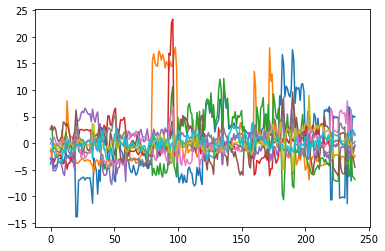

In [24]:
plt.plot(Y_sklearn)

Text(0.5, 1.05, 'Scatterplot matrix of PCA on 6+1 training data')

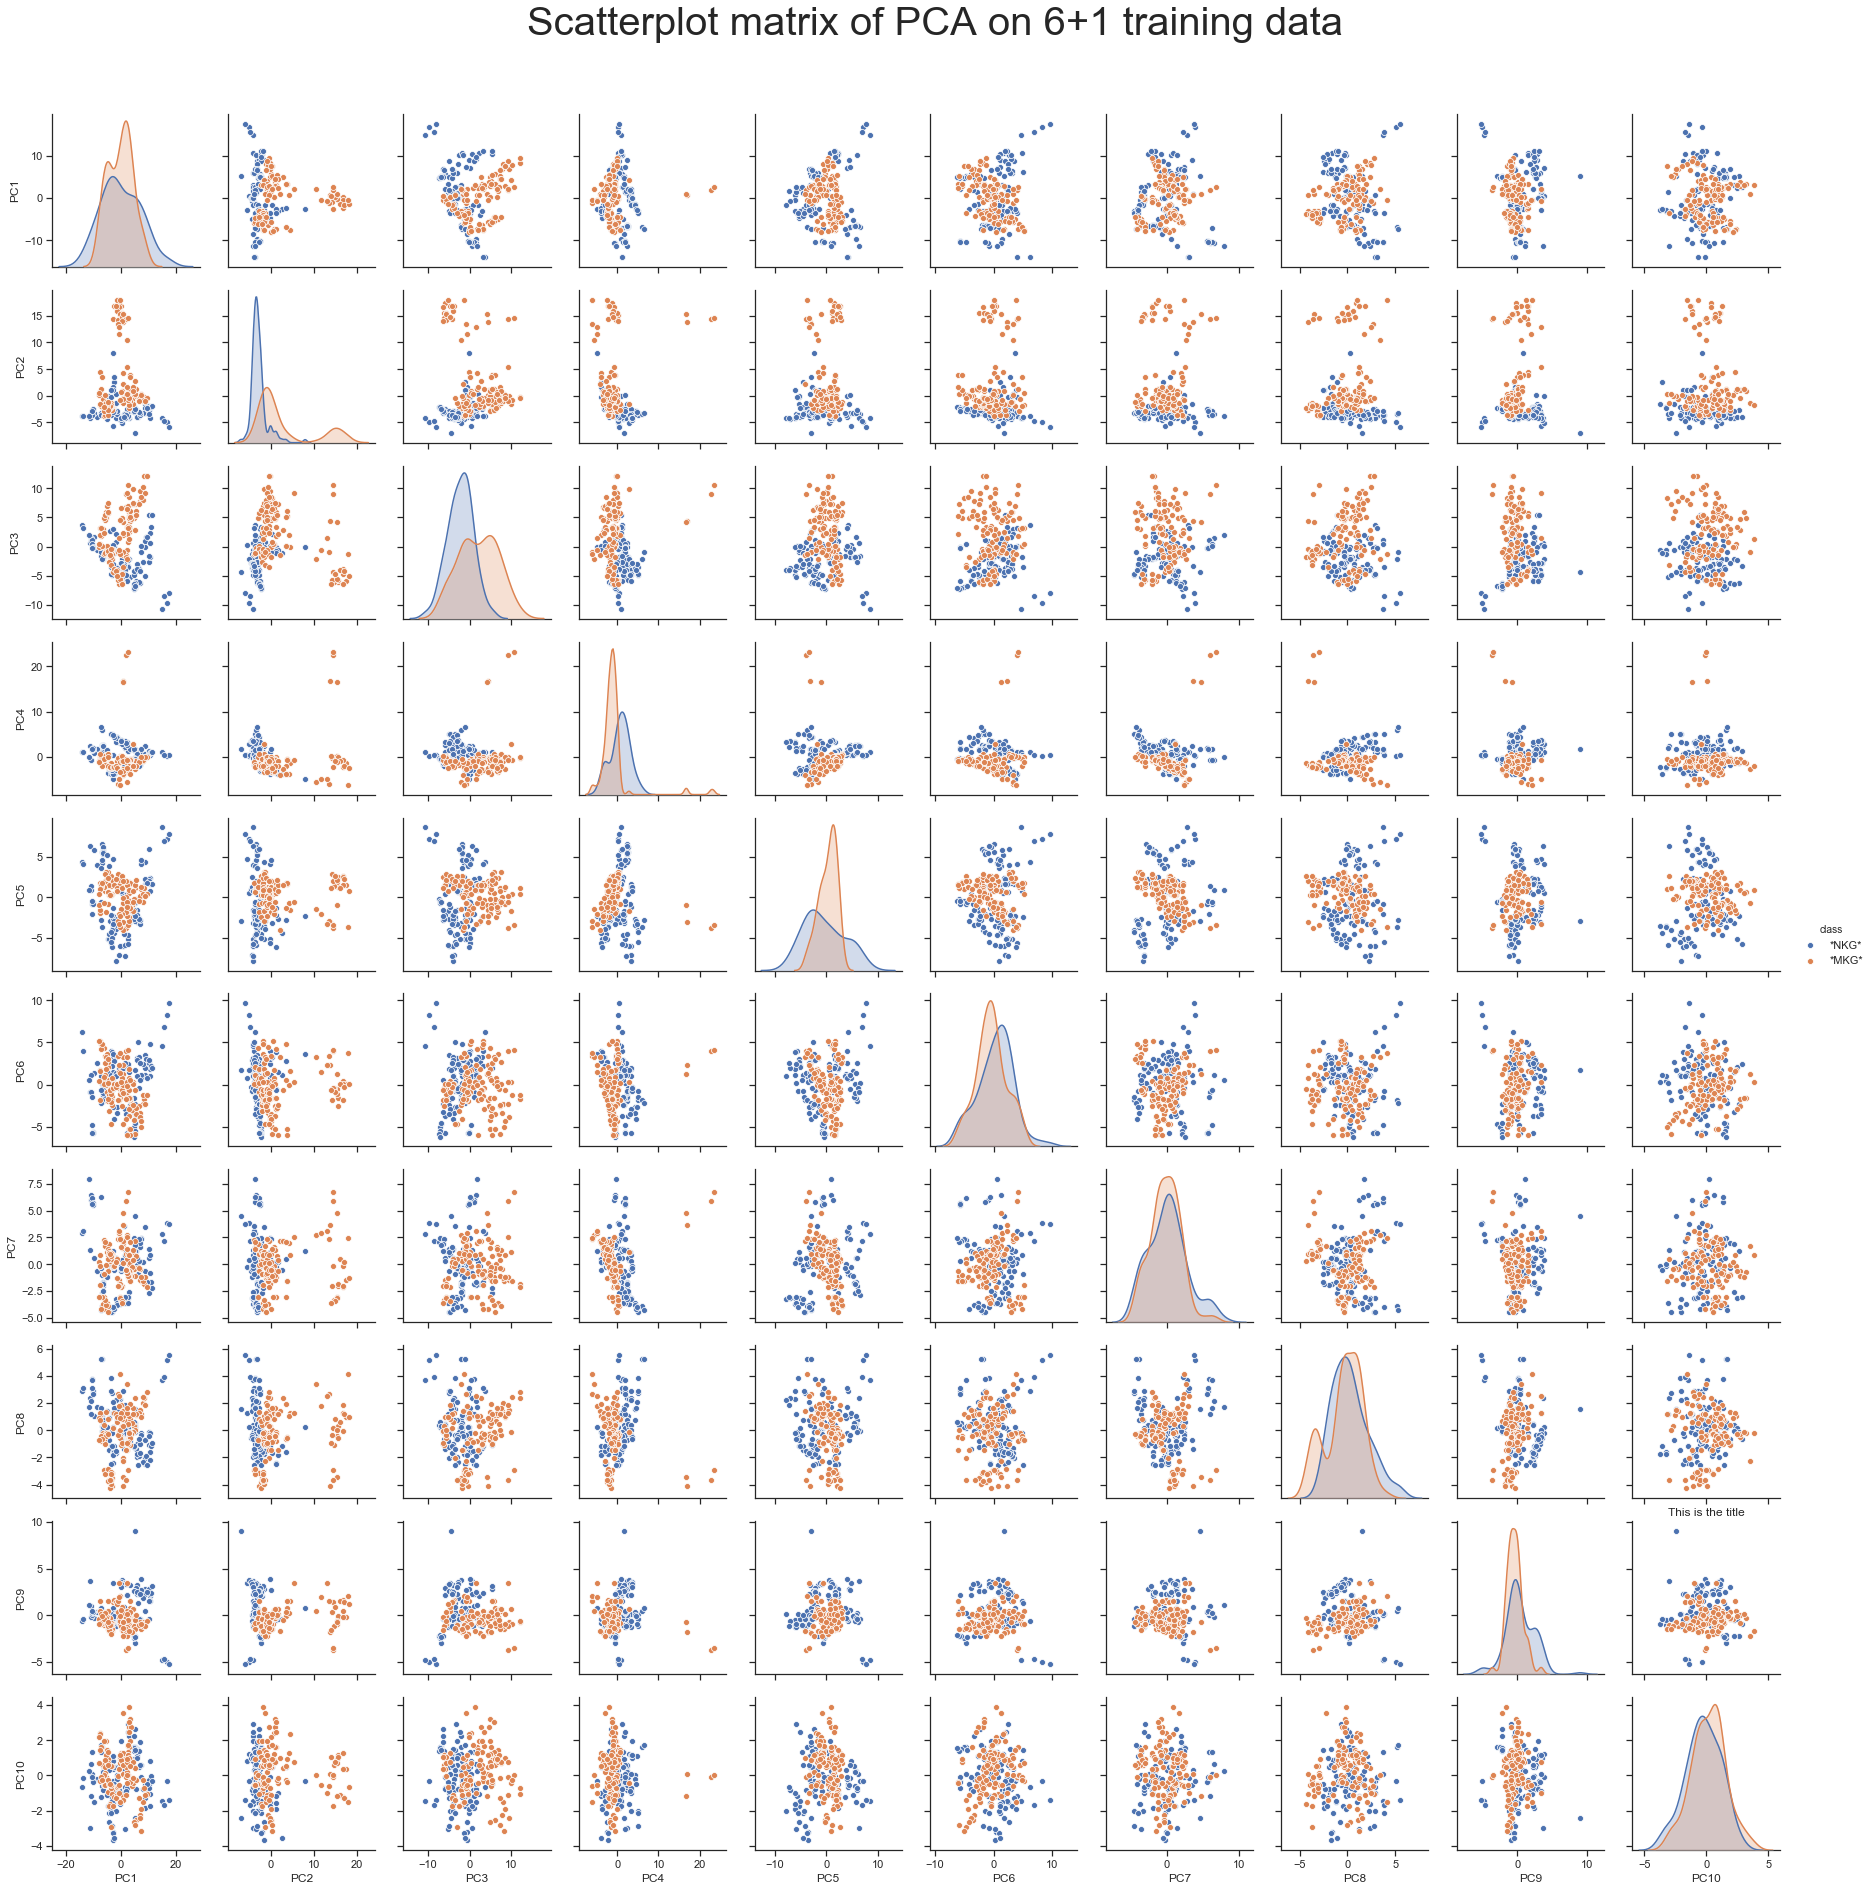

In [25]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(PCA_result, hue="class")
#sns.pairplot(Y_sklearn, diag_kind="kde")
#sns.pairplot(Y_sklearn, kind="reg")
plt.title('This is the title')
#plt.suptitle('This is the main title')
plt.suptitle('Scatterplot matrix of PCA on 6+1 training data', fontsize=40, y=1.05)

Text(0.5, 1.05, 'Scatterplot matrix of PCA on 6+1 training data')

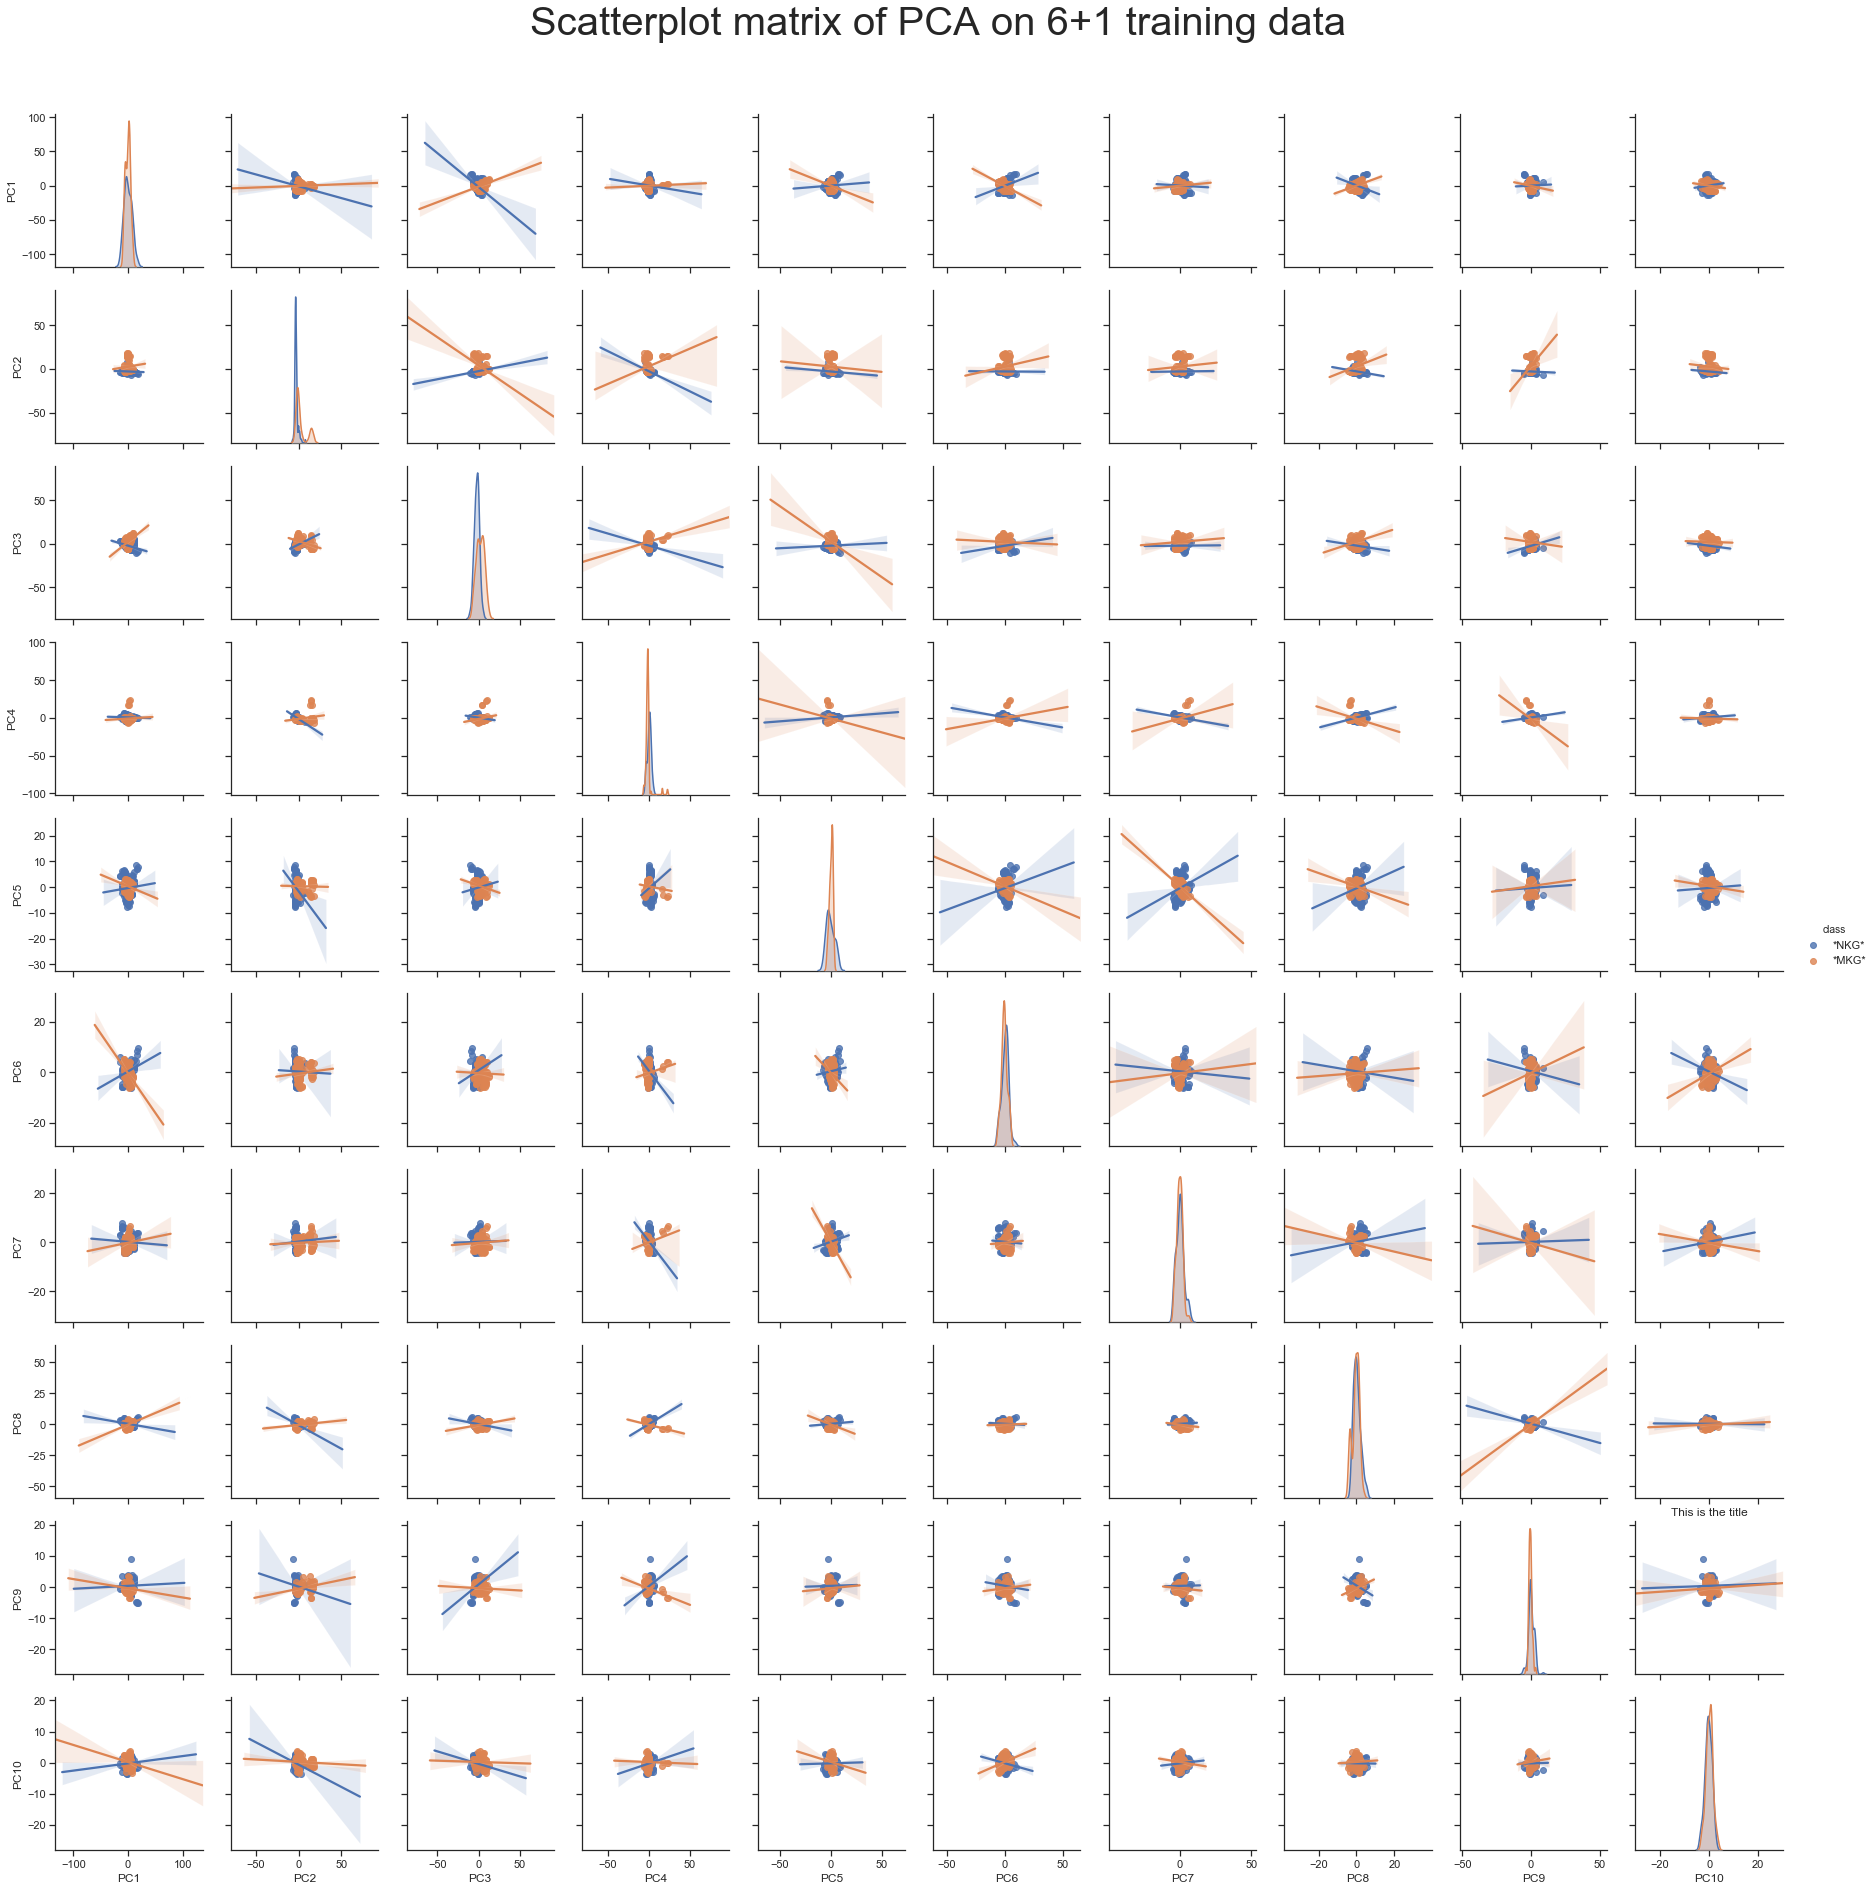

In [26]:
import seaborn as sns
sns.set(style="ticks")
#sns.pairplot(Y_sklearn, hue="PCs")
#sns.pairplot(Y_sklearn, diag_kind="kde")
sns.pairplot(PCA_result, kind="reg", hue="class")
plt.title('This is the title')
plt.suptitle('Scatterplot matrix of PCA on 6+1 training data', fontsize=40, y=1.05)


Text(0.5, 1.05, 'Scatterplot matrix of PCA on 6+1 training data')

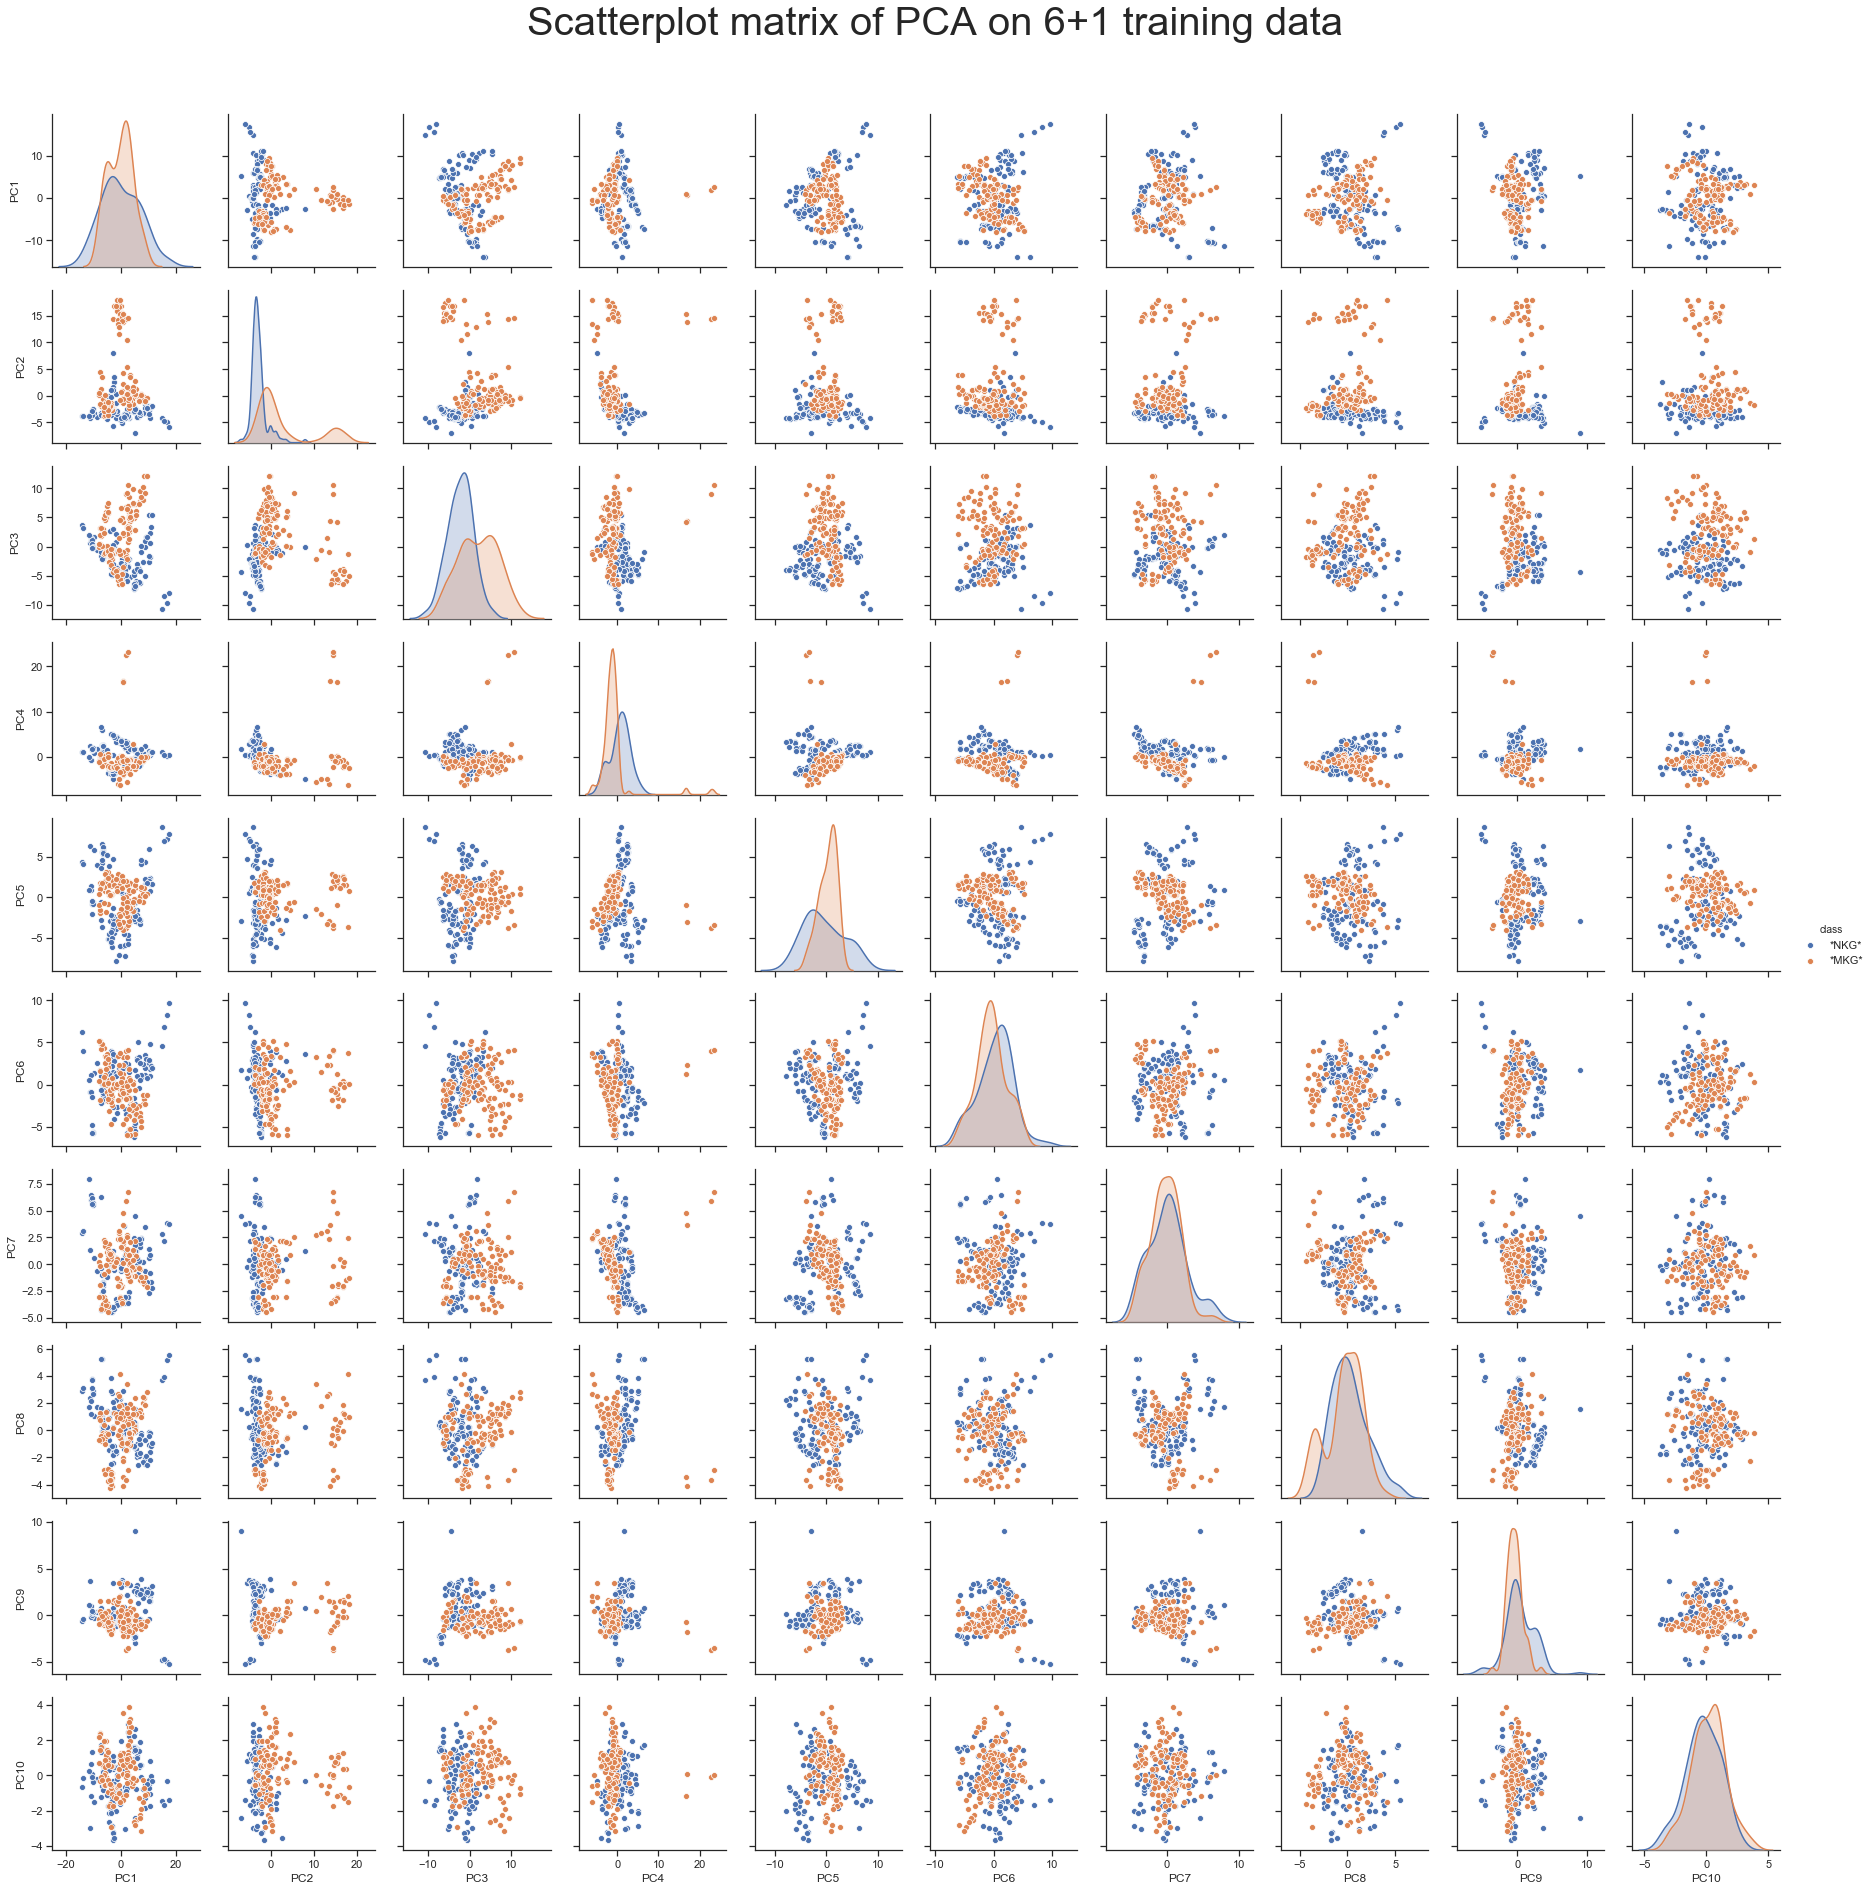

In [27]:
import seaborn as sns
sns.set(style="ticks")
#sns.pairplot(Y_sklearn, hue="PCs")
sns.pairplot(PCA_result, diag_kind="kde", hue="class")
#sns.pairplot(Y_sklearn, kind="reg")
plt.suptitle('Scatterplot matrix of PCA on 6+1 training data', fontsize=40, y=1.05)